## Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import os

## Libraries for Image 

In [2]:
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

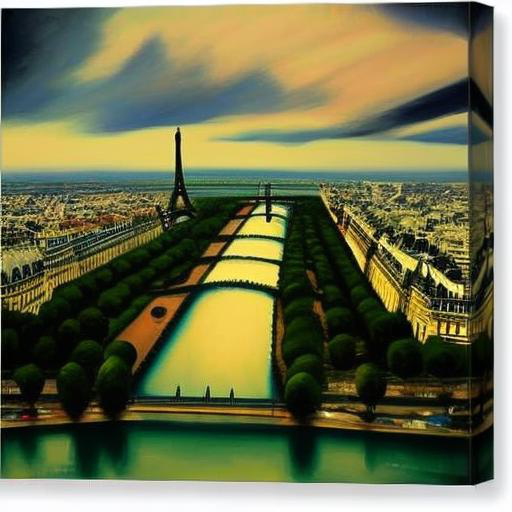

In [3]:
#PIL.Image.open('dataset/train/FAKE/5999.jpg')
PIL.Image.open('AI and real/train/AI/0013.jpg')


In [4]:
#image = cv2.imread('dataset/train/FAKE/5999.jpg')
#image = cv2.imread('dataset2\\train\\fake\\ZZXYG0W3UZ.jpg')
image = cv2.imread('AI and real/test/AI/0001.jpg')
image.shape

(960, 1200, 3)

In [5]:
train_path = 'AI and real//train'
test_path = 'AI and real//test'

## Defining a funciton to get input and output arrays 

In [6]:
def get_X_and_y(path):
    X = []
    y = []

    AI_path = os.path.join(path, 'AI')
    real_path = os.path.join(path, 'real')

    print("No. of AI images present:", len(os.listdir(AI_path)))
    print("No. of REAL images present:", len(os.listdir(real_path)))

    # Load AI images
    for file in os.listdir(AI_path):
        img_path = os.path.join(AI_path, file)
        img = cv2.imread(img_path)
        if img is not None:
            resized = cv2.resize(img, (32, 32)) / 255.0
            X.append(resized)
            y.append(0)
        else:
            print(f"[Warning] Skipping unreadable AI image: {file}")

    # Load REAL images
    for file in os.listdir(real_path):
        img_path = os.path.join(real_path, file)
        img = cv2.imread(img_path)
        if img is not None:
            resized = cv2.resize(img, (32, 32)) / 255.0
            X.append(resized)
            y.append(1)
        else:
            print(f"[Warning] Skipping unreadable REAL image: {file}")

    X = np.array(X)
    y = np.array(y)

    print("Total images loaded in X:", len(X))
    return X, y


### Extracting X_train and y_train for training

In [7]:
X_train , y_train = get_X_and_y(train_path)



No. of AI images present: 7000
No. of REAL images present: 7000
Total images loaded in X: 14000


### Extracting X_test and y_test for testing

In [8]:
X_test , y_test = get_X_and_y(test_path)
 

No. of AI images present: 2000
No. of REAL images present: 2000
Total images loaded in X: 4000


#### Checking the shape of each image

In [9]:
X_train[0].shape, y_train[0]

((32, 32, 3), 0)

## Designing a model for prediction

#### Importing **"keras"** for CNN

In [10]:
import keras
import tensorflow as tf
from tensorflow.keras import models , layers

In [11]:
model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
   #layers.Dense(2,activation = 'sigmoid'),
   layers.Dense(2, activation='softmax')  # ✅ Correct

                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train,y_train, epochs = 100)


Epoch 1/100
438/438 [==============================] - 9s 18ms/step - loss: 0.6374 - accuracy: 0.6281
Epoch 2/100
438/438 [==============================] - 11s 24ms/step - loss: 0.5976 - accuracy: 0.6792
Epoch 3/100
438/438 [==============================] - 11s 24ms/step - loss: 0.5778 - accuracy: 0.6971
Epoch 4/100
438/438 [==============================] - 10s 23ms/step - loss: 0.5621 - accuracy: 0.7099
Epoch 5/100
438/438 [==============================] - 10s 23ms/step - loss: 0.5492 - accuracy: 0.7173
Epoch 6/100
438/438 [==============================] - 10s 23ms/step - loss: 0.5255 - accuracy: 0.7356
Epoch 7/100
438/438 [==============================] - 10s 23ms/step - loss: 0.5117 - accuracy: 0.7499
Epoch 8/100
438/438 [==============================] - 11s 25ms/step - loss: 0.4864 - accuracy: 0.7606
Epoch 9/100
438/438 [==============================] - 10s 24ms/step - loss: 0.4654 - accuracy: 0.7758
Epoch 10/100
438/438 [==============================] - 10s 24ms/step - lo

In [12]:
model.evaluate(X_test,y_test) 

125/125 [==============================] - 1s 10ms/step - loss: 2.9750 - accuracy: 0.6745


[2.9749536514282227, 0.6744999885559082]

In [13]:
y_pred_prob  = model.predict(X_test)

125/125 [==============================] - 1s 9ms/step


In [14]:
y_pred_prob[:5]

array([[1.00000000e+00, 7.98291433e-10],
       [1.00000000e+00, 1.22204415e-08],
       [1.00000000e+00, 2.49880632e-08],
       [9.99998569e-01, 1.43113175e-06],
       [9.99998689e-01, 1.30415322e-06]], dtype=float32)

In [15]:
y_pred = [np.argmax(i) for i in y_pred_prob]
y_pred[:5]

[0, 0, 0, 0, 0]

## Classification Report

In [16]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.68      0.67      0.67      2000
           1       0.67      0.68      0.68      2000

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000



In [ ]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.92      0.95     10000
           1       0.93      0.98      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



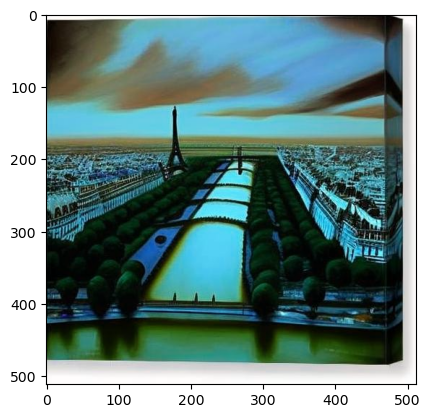

1/1 [==============================] - 0s 78ms/step
predicted Label: 0
AI Image


In [17]:
# write a function to check the model on any image and print the result as if 0 then fake else real

def check_image(image):
    img = cv2.imread(image)
    if img is None:
        print("image not found.check the file path")
        return
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img,(32,32))
    img = img/255
    img = np.expand_dims(img,axis = 0)
    #if np.argmax(model.predict(img)) #== 1:
    prediction = np.argmax(model.predict(img))
    print("predicted Label:",prediction)
    if prediction == 0:
        print('AI Image')
    else:
        print('real Image')
check_image('AI and real/train/AI/0013.jpg')
 

## Confusion Matrix 

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

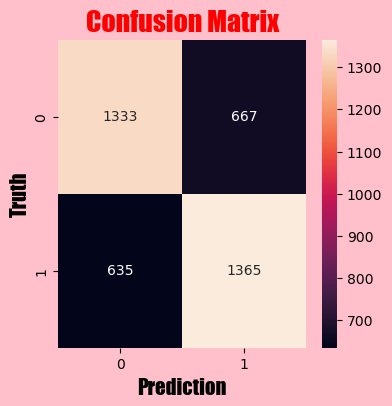

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()

## **THANK YOU !**

In [23]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import cv2

#file_upload = st.file_uploader("Upload File", type=["jpg", "png"], accept_multiple_files=True)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('model.hdf5')
    return model

model = load_model()
st.write("""
            # AI Image Detection
            """
            )

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

import cv2

from PIL import Image, ImageOps
import numpy as np


def import_and_predict(image_data, model):

        size = (32,32)
        image = ImageOps.fit(image_data, size, Image.LANCZOS)
        img = np.asarray(image)/255.0
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    #st.image(image, use_column_width=True)
    st.image(image, use_container_width=True)

    predictions = import_and_predict(image, model)
    class_names = ['AI','real']
    string = "This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)
    

Overwriting app.py


In [24]:
tf.keras.models.save_model(model,'model.hdf5')
#model.save('model.keras')

C:\Users\MEKALA POOJA\AppData\Local\Temp\ipykernel_26680\2375781752.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'model.hdf5')


In [1]:
!streamlit run app.py
 

^C
